# Segmentação de Clientes em grupos com características comportamentais similares

## Conhecendo o dataset
<hr>

### Descrição

O objetivo principal do projeto é desenvolver uma segmentação de clientes com comportamentos similares para definir a estratégia de marketing.

O Dataset de amostra resume o comportamento de uso de cerca de 9000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está em um nível de cliente com 18 variáveis ​​comportamentais.

### Dados

<ul>
    <li><b>CUST_ID:</b> Identificação do titular do Cartão de Crédito</li>
    <li><b>BALANCE:</b> Valor do saldo restante na conta para fazer compras</li>
    <li><b>BALANCE_FREQUENCY:</b> Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = frequentemente atualizado, 0 = não frequentemente atualizado)</li>
    <li><b>PURCHASES: </b> Valor gasto em compras</li>
    <li><b>ONEOFF_PURCHASES:</b> Valor máximo de compra feita de uma só vez</li>
    <li><b>INSTALLMENTS_PURCHASES:</b> Valor da compra feita em parcelas</li>
    <li><b>CASH_ADVANCE:</b> Dinheiro adiantado para o usuário</li>
    <li><b>PURCHASES_FREQUENCY:</b> Com que frequência as Compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprando frequentemente, 0 = não comprando frequentemente)</li>
    <li><b>ONEOFFPURCHASESFREQUENCY:</b> Com que frequência as compras estão acontecendo de uma só vez (1 = frequentemente, 0 = não frequentemente)</li>
    <li><b>PURCHASESINSTALLMENTSFREQUENCY:</b> Com que frequência as compras em parcelas estão sendo feitas (1 = frequentemente, 0 = não frequentemente)</li>
    <li><b>CASHADVANCEFREQUENCY:</b> Com que frequência as compras estão sendo pagas com dinheiro adiantado</li>
    <li><b>CASHADVANCETRX:</b> Número de transações feitas com "Dinheiro adiantado"</li>
    <li><b>PURCHASES_TRX:</b> Número de transações de compra feitas</li>
    <li><b>CREDIT_LIMIT:</b> Limite do cartão de crédito para o usuário</li>
    <li><b>PAYMENTS:</b> Valor do pagamento pelo usuário</li>
    <li><b>MINIMUM_PAYMENTS:</b> Valor mínimo de pagamentos feitos pelo usuário</li>
    <li><b>PRCFULLPAYMENT:</b> Porcentagem do pagamento integral pago pelo usuário</li>
    <li><b>TENURE:</b> Prazo do serviço de cartão de crédito para o usuário</li>
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import Normalizer
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import calinski_harabasz_score

pd.set_option('display.max_columns', None)

import os
os.environ['OMP_NUM_THREADS'] = '12'

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Para deixar o dataset mais limpo e não ficar carregando dados extras sem necessidade, iremos remover as colunas *CUST_ID* e *TENURE*, visto que elas não são relevantes para o modelo.

In [3]:
# Removendo as colunas CUST_ID e TENURE
df.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


## Análise Exploratória
<hr>

### Resumo do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Resumo estatístico dos dados

In [5]:
df.describe().round(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8949.000,8950.000,8637.000,8950.000
mean,1564.475,0.877,1003.205,592.437,411.068,978.871,0.490,0.202,0.364,0.135,3.249,14.710,4494.449,1733.144,864.207,0.154
std,2081.532,0.237,2136.635,1659.888,904.338,2097.164,0.401,0.298,0.397,0.200,6.825,24.858,3638.816,2895.064,2372.447,0.292
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,0.000,0.019,0.000
25%,128.282,0.889,39.635,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,1600.000,383.276,169.124,0.000
50%,873.385,1.000,361.280,38.000,89.000,0.000,0.500,0.083,0.167,0.000,0.000,7.000,3000.000,856.902,312.344,0.000
75%,2054.140,1.000,1110.130,577.405,468.638,1113.821,0.917,0.300,0.750,0.222,4.000,17.000,6500.000,1901.134,825.485,0.143
max,19043.139,1.000,49039.570,40761.250,22500.000,47137.212,1.000,1.000,1.000,1.500,123.000,358.000,30000.000,50721.483,76406.208,1.000


Podemos notar que a variável *CASH_ADVANCE_FREQUENCY* apresenta um valor máximo de 1.5. Isso pode ter sido preenchido errado, visto que por ser um dado de frequência, ele só pode ir até 1.0, que representa 100%.

Na célula abaixo iremos verificar a quantidade de ocorrências com esse tipo de erro e trataremos mais adiante, caso seja necessário.

In [6]:
df[df['CASH_ADVANCE_FREQUENCY'] > 1].value_counts().sum()

8

In [7]:
df[df['CASH_ADVANCE_FREQUENCY'] > 1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
681,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0
1626,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0
2555,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0
2608,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0
3038,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0
3253,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0
8055,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0
8365,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0


Ao que tudo indica, esses dados foram contabilizados de forma erronea. Iremos verificar os boxplots e distribuições de dados, mais adiante para definir como iremos tratar esses dados na etapa de Tratameno de Dados.

### Verificando valores *missing*

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Esses valores precisarão ser tratados. Vamos verificar o boxplot das variáveis para conhecer mais sobre suas características e trataremos os dados missing de acordo com a natureza de cada variável.

### Verificando os boxplots dos dados

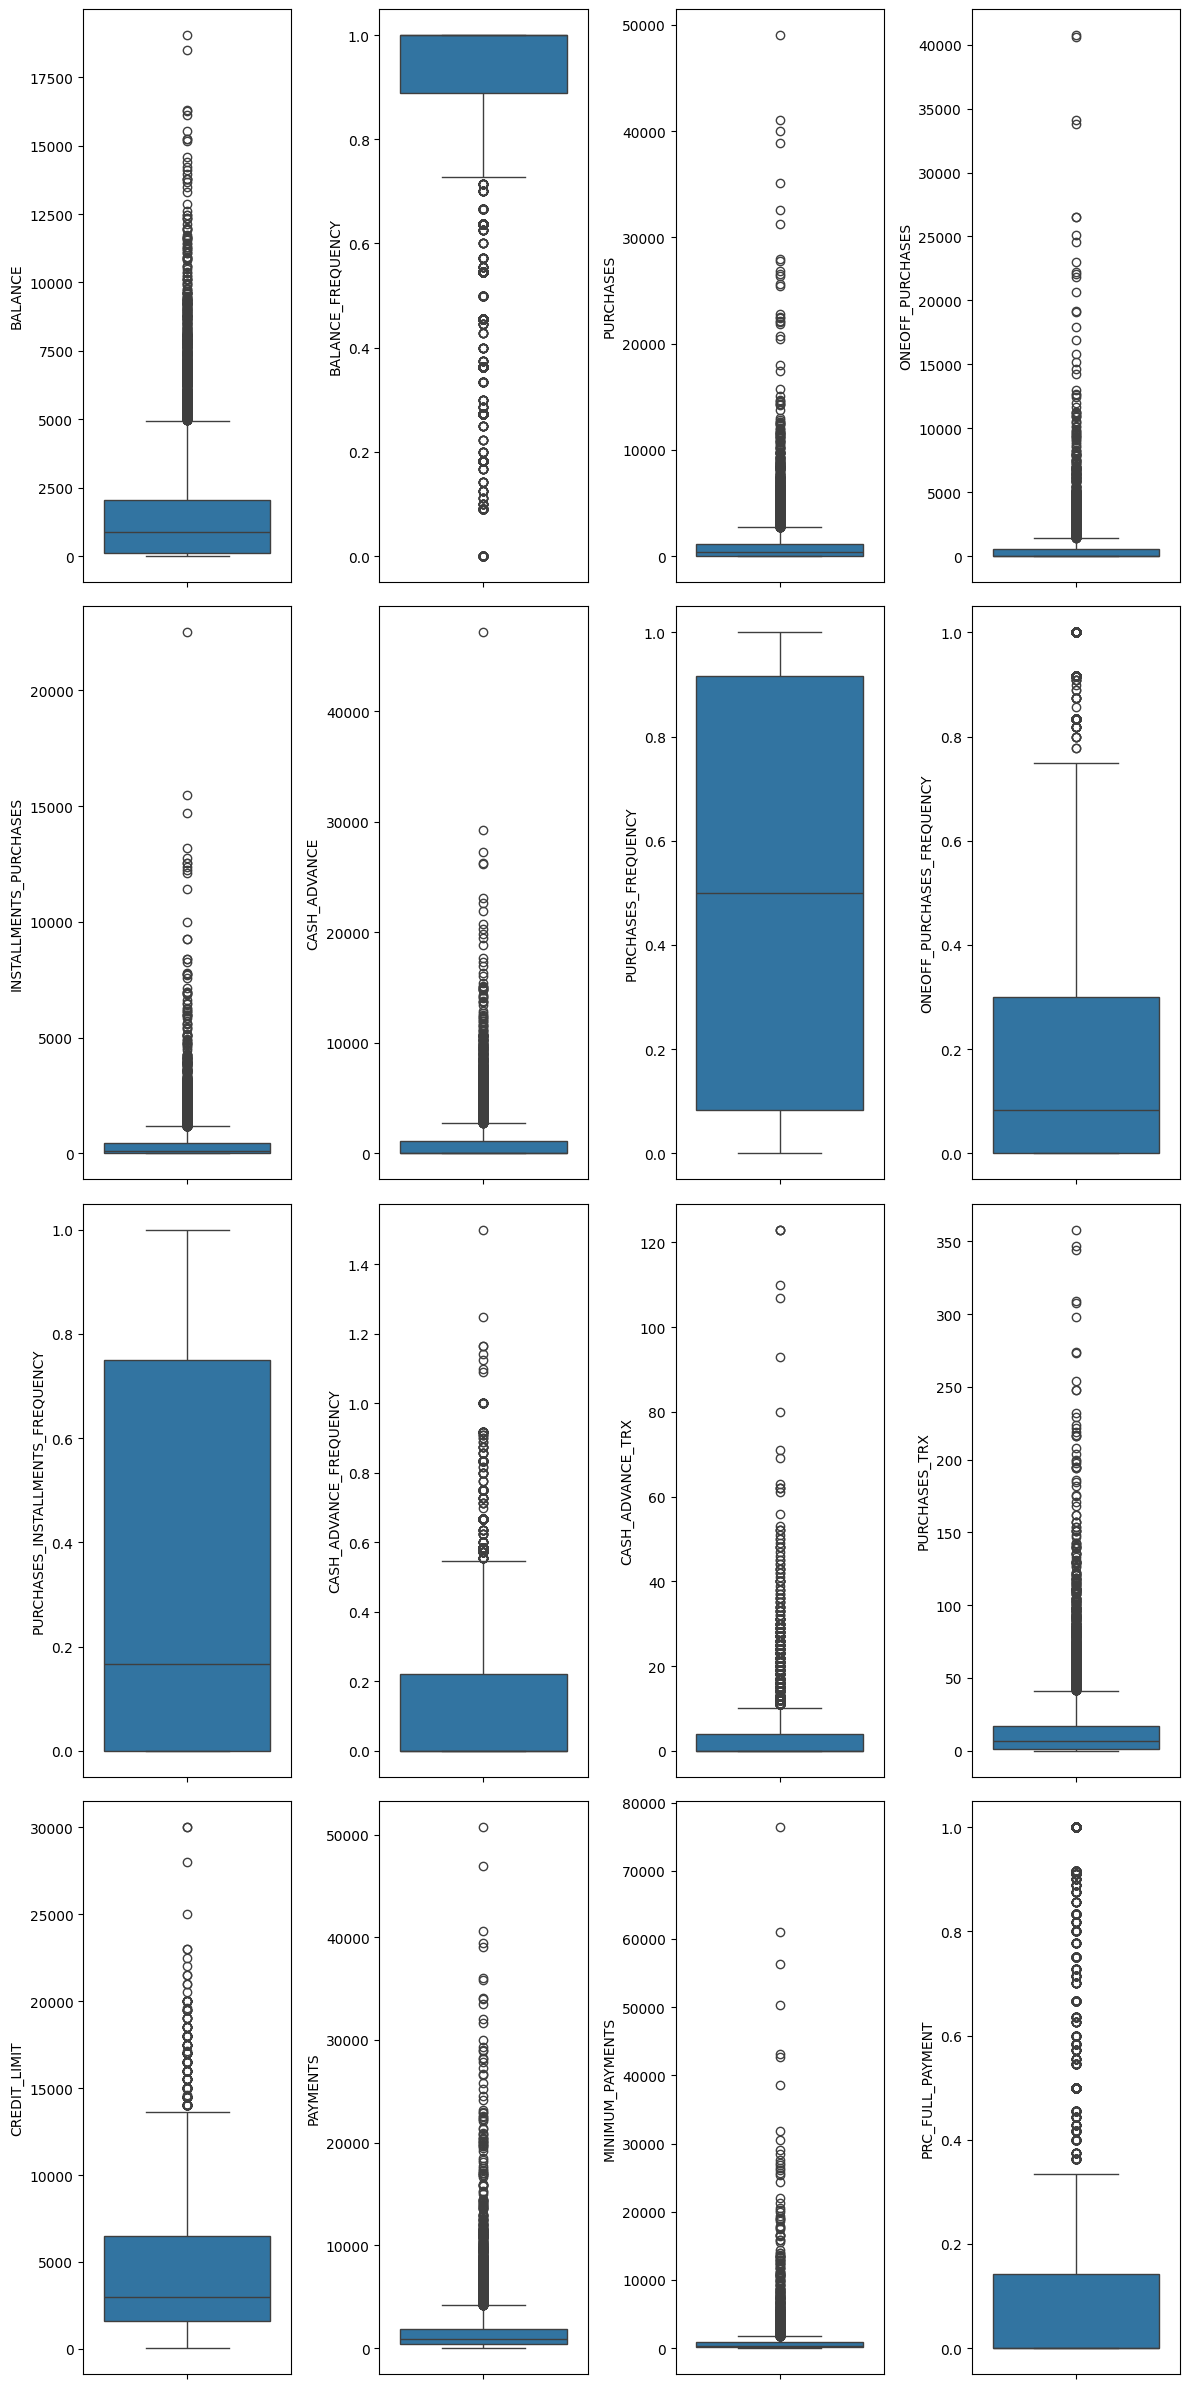

In [9]:
_, axes = plt.subplots(4,4,figsize=(12,24))

line = 0
col = 0

for i in df.columns:
    sns.boxplot(df[i], ax=axes[line,col])
    col+=1
    if col > 3:
        col=0
        line+=1
        
plt.tight_layout()
plt.show()

Quase todas as variáveis apresentam grande quantidade de possíveis outliers. Por se tratar do comportamento e renda de diversos tipos de pessoas, é natural que essas variáveis oscilem muito os seus valores. Logo, não iremos remover nenhum possível outlier.

Na seção abaixo, analisaremos a distribuição de frequências de cada variável.

### Distribuições de frequências

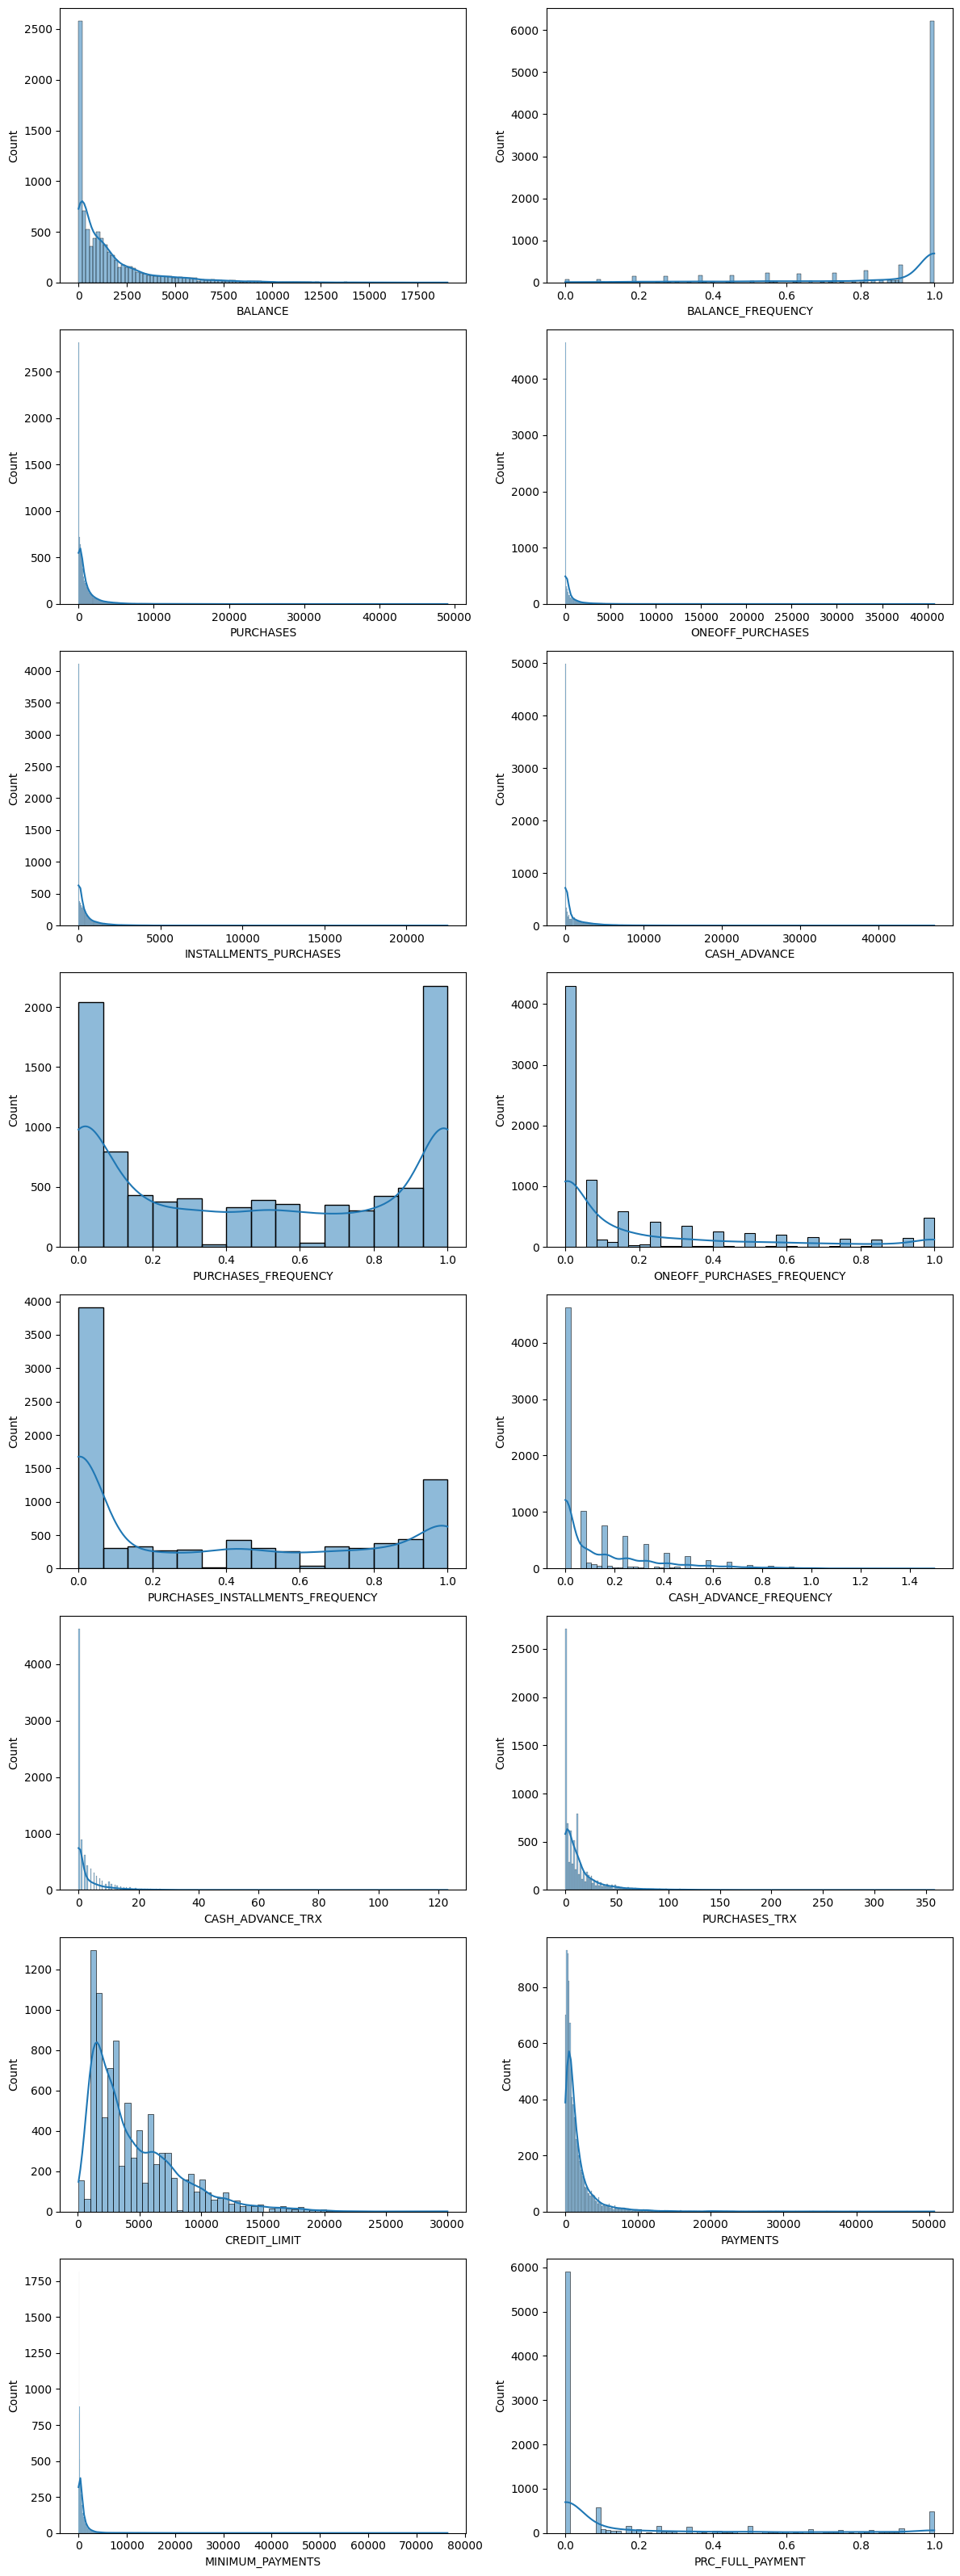

In [10]:
_, axes = plt.subplots(8,2,figsize=(12,32))

line = 0
col = 0

for i in df.columns:
    sns.histplot(df[i], kde=True,  ax=axes[line,col])
    col+=1
    if col > 1:
        col=0
        line+=1
        
plt.tight_layout()
plt.show()

Nenhuma das variáveis apresenta distribuição normal. Entretanto, como não faremos testes estatísticos, isso não irá interferir no nosso resultado final.

### Tratamendo dos dados

<ul>
    <li><b>CASH_ADVANCE_FREQUENCY:</b> Como visualizado nos gráficos de boxplot e distribuição de frequência, a maioria das ocorrências se deu de 0.0 a 0.2. Isso nos sugere que os dados foram prenchidos erroneamente. Ao invés de preencher 0.125, foi preenchido 1.125. Iremos diminuir 1 de cada ocorrência.</li>
    <li><b>CREDIT_LIMIT e MINIMUM_PAYMENTS:</b> Como visto nas seções anteriores, a grande maioria das variáveis apresenta muitos valores classificados como possíveis outliers. Em virtude disso, iremos utilizar a mediana para preencher os valores missing, visto que a mediana é mais robusta à presença de outliers.</li>
</ul>

Também será feita a normalização dos dados.

In [11]:
df.loc[df['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] -=1
df['CASH_ADVANCE_FREQUENCY'].max()

1.0

In [12]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [13]:
values = Normalizer().fit_transform(df)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## Fazendo a clusterização

### Criando modelo

In [14]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

### Avaliando modelo com Silhouette

In [15]:
labels = kmeans.labels_
silhouette = silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36457606316005514


Como o valor do índice de Silhouette foi maior que zero, podemos considerá-lo como bom.

### Avaliando com Davies-Bouldin

In [16]:
dbs = davies_bouldin_score(values, labels)
print(dbs)

1.0749530537080825


### Avaliando com Calinski-Harabasz

In [17]:
calinski = calinski_harabasz_score(values, labels)
print(calinski)

3431.580020842876


### Validação Relativa

Criaremos alguns modelos, variando o número de clusters e, ao final, verificaremos qual modelo apresentou o melhor resultado.

In [18]:
def clustering_algorithm(n_clusters, df):
    kmeans = KMeans(n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    s = silhouette_score(df, labels, metric='euclidean')
    dbs = davies_bouldin_score(df, labels)
    calinski = calinski_harabasz_score(df, labels)
    return s, dbs, calinski

In [19]:
validacao = pd.DataFrame(columns=['silhouette', 'davies_bouldin', 'calinski'])
lista = []
n_clusters = [3, 5, 7, 10, 50]
for i, cluster in enumerate(n_clusters):
    s, dbs, calinski = clustering_algorithm(cluster, values)
    validacao.loc[i] = clustering_algorithm(cluster, values)

validacao['n_clusters'] = n_clusters

In [20]:
validacao

,silhouette,davies_bouldin,calinski,n_clusters
0,0.327245,1.309351,3526.466834,3
1,0.364628,1.074880,3431.574620,5
2,0.327751,1.150920,3398.381919,7
3,0.351421,1.116424,3019.194450,10
4,0.249242,1.202893,1616.577444,50


Analisando os indices acima, percebemos que 5 clusters apresentaram melhores resultados para Silhouette e Davies-Bouldin. Nota-se também que, o índice de Silhouette, que é o mais utilizado, teve sua melhor performance para essa quantidade de clusters. Em virtude disso, iremos escolher 5 clusters.\
\
Além da análise acima, iremos realizar uma comparação utilizando um dataset de números aleatórios. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas e, por conseguinte, uma estrutura capaz de ser clusterizada.

### Testando o modelo com dados aleatórios

Gerando um conjunto aleatorio de dados com a mesma quantidade de linhas e colunas para ajudar a validar nosso modelo. A ideia é que o modelo apresente resultados piores para valores aleatórios, visto que esses não possuem padrões.

In [21]:
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)

print('Desempenho do modelo para dados aleatórios')
print('silhouette          ', s.round(7))
print('davies_boluding     ', dbs.round(7))
print('valinski          ', calinski.round(7))
print('\n')

print('Desempenho do modelo para o dataset original')
print(validacao.iloc[1,:])

Desempenho do modelo para dados aleatórios
silhouette           0.0395598
davies_boluding      3.4807422
valinski           301.1870467


Desempenho do modelo para o dataset original
silhouette           0.364628
davies_bouldin       1.074880
calinski          3431.574620
n_clusters           5.000000
Name: 1, dtype: float64


Nota-se que os índices para do segundo bloco, que são os do nosso dataset original, foram bem melhores que os do dataset aleatório

### Validando a estabilidade do cluster

Para validar a estabilidade do nosso modelo, iremos dividir nosso dataset em três partes de mesmo tamanho e verificar o comportamento do modelo para os três novos datasets. A ideia é que o modelo apresente comportamento parecido para todos os três.

In [22]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

C:\Users\caior\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\caior\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\caior\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


0.37098923171521797 1.0421931450346813 1200.2020718894455
0.35327282868587234 1.1428565511954127 1194.93973602916
0.36685269244025737 1.0988027840052115 1167.529972300574


Nota-se que o modelo apresentou métricas muito semelhantes para os três datasets. Isso fortalece a evidência de estailidade dos clusters. Mesmo com partes do dataset, ele consegue manter indices semelhantes.

### Criando modelo final

In [23]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

## Visualização

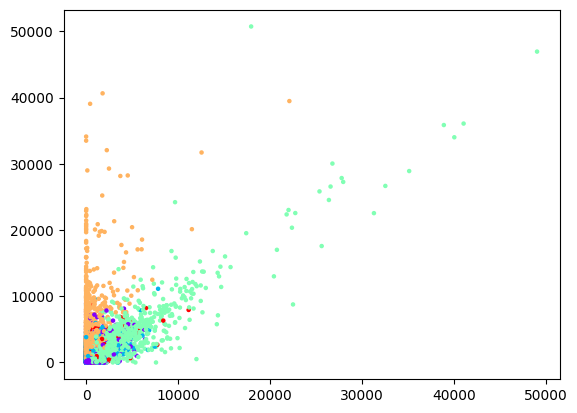

In [24]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')

Como o dataset possui 16 variáveis, teriamos que plotar diversos gráficos para analisar todos os pares de variáveis. Isso se torna inviável. 

Analisaremos, então, as variáveis que forem mais significativas para o modelo. 
A forma comofaremoss isso é através dos centroides de cada argumento em cada cluster. Iremos calcular a variância entre todos os clusters dos centroides de cada argumento, aqueles que apresentarem maior variância serão os que nós utilizaremos para análises, visto que estes podem apresentar maior significância para o modelo

#### Calculando centroides

In [25]:
centroids = kmeans.cluster_centers_
centroids

array([[6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
        7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.36686718e-05,
        1.40328311e-04, 7.92341768e-06, 1.23962309e-04, 2.86381277e-03,
        9.43564102e-01, 1.53799817e-01, 5.68529799e-02, 7.61493366e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.71403687e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [1.60024706e-01, 2.45463238e-04, 4.38782328e-01, 2.57144577e-01,
        1.81809709e-01, 2.53743879e-02, 2.04517615e-04, 8.90287035e-05,
        1.50743855e-04, 9.35680559e-06, 1.69153111e-04, 6.17796821e-03,
        6.03613847e-01, 4.02560302e-01, 8.55015664e-02, 7.20337923e-05],
       [2.34955101e-01, 2.16241674e-04, 6.09376425e-02, 3.48207303e-02,
        2.61221122e-02, 3.99771273e-01, 5.27678241e-05, 2.067

In [26]:
centroids[0]

array([6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
       7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.36686718e-05,
       1.40328311e-04, 7.92341768e-06, 1.23962309e-04, 2.86381277e-03,
       9.43564102e-01, 1.53799817e-01, 5.68529799e-02, 7.61493366e-05])

#### Calculando a varância

In [27]:
for i in range(len(centroids[0])):
    print(df.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


#### Iremos utilizar os seguintes argumentos:

BALANCE
0.0224\
PURCHASES
0.0197\
CASH_ADVANCE
0.0225\
CREDIT_LIMIT
0.0360\
PAYMENTS
0.0279\
PRC_FULL_PAYMENT
0.0000

Pela própria natureza da informação a respeito da variável MINIMUM_PAYMENT, sabemos que ela não é tão relevante na prática, por isso não iremos utilizá-la. 

Apesar de a variável PRC_FULLPAYMENT apresentar baixa relevância, de acordo com a variância dos centroides, sabe-se que essa variável é muito importante, pois revela se os clientes de determinado cluster são bons pagadores ou não. 

#### Criando novo dataset com os dados das variáveis mais significativas

In [28]:
df['CLUSTER'] = kmeans.labels_

description = df.groupby('CLUSTER')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,n_clients
CLUSTER,,,,,,,
0,443.746756,629.249107,141.482978,5130.547795,814.294226,0.246806,3280
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,0.001799,2649
2,1142.514535,3274.126719,181.727235,4096.718849,3036.609179,0.278331,1536
3,1794.443291,478.411620,3266.686592,3983.399639,4712.044614,0.117321,1074
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,0.019318,411


## Analisando os clusters

CLUSTER 0: Clientes que gastam muito com saques. Pagam as vezes. \
CLUSTER 1: Clintes que gastam muito com compras. Melhores pagadores. \
CLUSTER 2: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa qantidade de clientes.\
CLUSTER 3: Clientes que gastam pouco. Clientes com maior limite. Bons pagadores. Maior número de clientes.\
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes. 

## Estratégias de marketing

<ul>
    <li><b>CLUSTER 0:</b> Clientes gastam muito com saques e pagam as vezes. Uma estratégia poderia ser conceder um cashback para o pagamento em dia da fatura. Ou redução do limite depois de atrasos freuentes no pagamento da fatura.</li>
    <li><b>CLUSTER 1:</b> São os melhores pagadores e os clientes que mais gastam. Uma possível estratégia seria aumentar gradativamente o limite e incetivar a fazer mais compras, como programa de pontos e milhas. limite.</li>
    <li><b>CLUSTER 2:</b> Boa quantidade de clientes, gastam muito em saque, mas são os piores pagadores. Poderia ser adotada uma estratégia semelhante ao cluster 0, mas seria interessante também acrescentar o programa de pontos e milhas para incentivar o pagamento da fatura.</li>
    <li><b>CLUSTER 3:</b> Possue o maior número de clientes, são bons pagadores, gastam muito e já possuem um bom limite. Uma possível estratégia seria criar um programa de pontos e milhas que os incentive a gastar mais. No início, a campanha pode conceder mais pontos por real gasto e depois de alguns meses diminuir.</li>
    <li><b>CLUSTER 4:</b> Menor quantidade de clientes, não são bons pagadoresm, mas já têm o menor limite. Uma estratégia seria cancelar a conta depois de alguns meses sem o pagamento da fatura.</li>
</ul>